In [1]:
#Importing the essential libraries
import string
import re
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
#Loading the dataset
df=pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Projects\Python\Language Detection Model\Language Detection.csv")
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [3]:
#Loading English raw data from the dataset
english_df = df[df['Language'] == 'English'].rename(columns={'Text': 'English'})
english_df

,English,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
1380,what your mistake was come let's feed you some...,English
1381,narcisa changed her ways she struggled at firs...,English
1382,how's narcissism now marian told them both eve...,English
1383,has she i guess she wouldn't want any more gol...,English


In [4]:
#Loading German raw data from the dataset
german_df = df[df['Language'] == 'German'].rename(columns={'Text': 'German'})
german_df

,German,Language
9498,.Wir sind alle auf der Suche nach schnellen We...,German
9499,"Ich weiß, ich verstehe, was passiert, ist, das...",German
9500,Wie wäre es also mit uns?,German
9501,Lernen Sie einige intelligente neue englische ...,German
9502,Also werden wir heute 10 neue intelligente Wör...,German
...,...,...
9963,narcisa änderte ihre art und weise sie kämpfte...,German
9964,Wie' s Narzissmus jetzt erzählt Marian beiden ...,German
9965,"Hat sie, ich denke, sie würde jetzt kein Goldb...",German
9966,"Terry, du siehst tatsächlich ein bisschen wie ...",German


In [5]:
#Loading French raw data from the dataset
french_df = df[df['Language'] == 'French'].rename(columns={'Text': 'French'})
french_df

,French,Language
3250,Si vous disposez d'ouvrages ou d'articles de r...,French
3251,Comment ajouter mes sources ?,French
3252,Cette page ou section est en train d'être trad...,French
3253,Vous pouvez aider au développement de Wikipédi...,French
3254,Le mot nature est un terme polysémique (c’est-...,French
...,...,...
4259,"quelle a été votre erreur, nous allons vous no...",French
4260,"narcisa a changé ses manières, elle a lutté au...",French
4261,Comment' Le narcissisme de s maintenant marian...,French
4262,a-t-elle je suppose qu'elle ne voudrait plus d...,French


In [6]:
#Loading Spanish raw data from the dataset
spanish_df = df[df['Language'] == 'Spanish'].rename(columns={'Text': 'Spanish'})
spanish_df

,Spanish,Language
4810,Nature es una de las más prestigiosas revistas...,Spanish
4811,Su primer número fue publicado el 4 de noviemb...,Spanish
4812,"[2]​ Con una periodicidad semanal, la revista ...",Spanish
4813,"Nature tiene oficinas en Londres, Nueva York, ...",Spanish
4814,La editorial publica también varias revistas e...,Spanish
...,...,...
5624,¿Tiene ella?,Spanish
5625,Supongo que no querría más pan de oro ahora ¿e...,Spanish
5626,"Terry, en realidad te pareces un poco a ese án...",Spanish
5627,¿Cómo pudiste ser él?,Spanish


In [7]:
#Loading Malayalam raw data from the dataset
malayalam_df = df[df['Language'] == 'Malayalam'].rename(columns={'Text': 'Malayalam'})
malayalam_df

,Malayalam,Language
1385,ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദ...,Malayalam
1386,ഭൗതികപ്രതിഭാസങ്ങളും ജീവനും പ്രകൃതിയുടെ ഘടകങ്ങള...,Malayalam
1387,മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി...,Malayalam
1388,അവയെ കൃത്രിമം എന്ന് വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായ...,Malayalam
1389,പ്രകൃതി എന്ന പദം പ്രപഞ്ചത്തെയും അതിലെ സമസ്ത പ്...,Malayalam
...,...,...
1974,നിങ്ങളുടെ തെറ്റ് വന്നത് ആ ദിവസം മുതൽ നിങ്ങൾക്ക...,Malayalam
1975,"നാർസിസ ആദ്യം പാടുപെട്ട വഴികൾ മാറ്റി, പക്ഷേ പതു...",Malayalam
1976,എങ്ങനെ' സംഭവിച്ച എല്ലാ കാര്യങ്ങളും ഇപ്പോൾ മരിയ...,Malayalam
1977,"അവൾക്കറിയാമോ, അവൾക്ക് ഇപ്പോൾ കൂടുതൽ സ്വർണ്ണ റൊ...",Malayalam


In [8]:
#Loading Hindi raw data from the dataset
hindi_df = df[df['Language'] == 'Hindi'].rename(columns={'Text': 'Hindi'})
hindi_df

,Hindi,Language
1979,विकि-शब्दकोष (एक मुक्त शब्दकोष एवं समानांतर को...,Hindi
1980,"[42] अंत में, विकिपीडिया एक पक्ष नहीं लेता है।...",Hindi
1981,बोट्स नामक कंप्यूटर प्रोग्राम के निर्माण के बा...,Hindi
1982,"""""नहीं, हम नहीं जानते"", जिमी ने कहा.",Hindi
1983,[60] कुछ आलोचकों का दावा है कि विकिपीडिया की ख...,Hindi
...,...,...
2037,मैं सोच रहा था कि क्या यो मेरी मदद कर सकता है।...,Hindi
2038,कैसे कुछ आइसक्रीम के बारे में?,Hindi
2039,क्या आप मुझे एक सवारी घर देना चाहेंगे?,Hindi
2040,"जी बोलिये। यह बहुत अच्छा होगा, धन्यवाद। मैं ठी...",Hindi


In [9]:
#Loading Tamil raw data from the dataset
tamil_df = df[df['Language'] == 'Tamil'].rename(columns={'Text': 'Tamil'})
tamil_df

,Tamil,Language
2042,விக்கிப்பீடியா (Wikipedia; /ˌwɪkɪˈpiːdiə/ (கேட...,Tamil
2043,"தமிழ் விக்கிப்பீடியாவின் 1,00,000க்கும் மேற்பட...",Tamil
2044,"பெரும்பாலும் இதன் எல்லாக் கட்டுரைகளும், இதனைப்...",Tamil
2045,"[6] மேலும் இது கிட்டத்தட்ட 100,000 முனைப்பான ப...",Tamil
2046,"[7][8] சனவரி 2021 வரையில், விக்கிப்பீடியா 285 ...",Tamil
...,...,...
2506,"உங்கள் தவறு என்னவென்றால், அன்றிலிருந்து இன்றுவ...",Tamil
2507,நர்சிசா அவள் முதலில் போராடிய வழிகளை மாற்றினாள்...,Tamil
2508,எப்படி ' இப்போது நடந்த எல்லாவற்றையும் மரியான் ...,Tamil
2509,அவள் இனிமேல் தங்க ரொட்டியை விரும்ப மாட்டாள் என...,Tamil


In [10]:
#Loading Portugeese raw data from the dataset
portugeese_df = df[df['Language'] == 'Portugeese'].rename(columns={'Text': 'Portugeese'})
portugeese_df

,Portugeese,Language
2511,Nature é uma revista científica interdisciplin...,Portugeese
2512,[2] Foi classificada como a revista científica...,Portugeese
2513,[3] A Nature tem um público on-line de cerca d...,Portugeese
2514,[4] A revista tem uma circulação semanal de ce...,Portugeese
2515,[5] Os cientistas da pesquisa são o público pr...,Portugeese
...,...,...
3245,"qual foi o seu erro, vamos alimentar você com ...",Portugeese
3246,"narcisa mudou seus hábitos, ela lutou no iníci...",Portugeese
3247,Como' s narcisismo agora marian contou a ambos...,Portugeese
3248,"tem ela, eu acho que ela não iria querer mais ...",Portugeese


In [11]:
#Loading Dutch raw data from the dataset
dutch_df = df[df['Language'] == 'Dutch'].rename(columns={'Text': 'Dutch'})
dutch_df

,Dutch,Language
4264,Nature (Engels voor 'natuur') is een Brits voo...,Dutch
4265,Het staat als gerenommeerd bekend.,Dutch
4266,Het verscheen voor het eerst op 4 november 186...,Dutch
4267,Het groeide uit van een eenvoudige publicatie ...,Dutch
4268,Een publicatie in Nature wordt door wetenschap...,Dutch
...,...,...
4805,Ik weet dat het me zo spijt van de manier waar...,Dutch
4806,narcisa veranderde haar manier van doen ze wor...,Dutch
4807,hoe' Marian vertelde hun nu allebei alles wat ...,Dutch
4808,"heeft ze, denk ik dat ze nu geen goudbrood mee...",Dutch


In [12]:
#Loading Greek raw data from the dataset
greek_df = df[df['Language'] == 'Greek'].rename(columns={'Text': 'Greek'})
greek_df

,Greek,Language
5629,Δεν υπάρχει αυτή τη στιγμή λήμμα με αυτόν τον...,Greek
5630,Αν περιμένατε να βρίσκεται εδώ μια σελίδα και ...,Greek
5631,(Δείτε την γρήγορη διαγραφή σελίδων για πιθανο...,Greek
5632,Μπορείτε να δοκιμάστε την λειτουργία εκκαθάρισ...,Greek
5633,"Η Βικιπαίδεια (αγγλικά: Wikipedia, γουικιπίντι...",Greek
...,...,...
5989,"τι ήρθε το λάθος σου, ας σου δώσουμε κάτι ωραί...",Greek
5990,Η ναρκίσσα άλλαξε τους τρόπους της που αγωνίστ...,Greek
5991,"πως' Ο ναρκισσισμός, τώρα η Μαρία, τους είπε ό...",Greek
5992,Μήπως υποθέτω ότι δεν θα ήθελε άλλο χρυσό ψωμί...,Greek


In [13]:
#Loading Russian raw data from the dataset
russian_df = df[df['Language'] == 'Russian'].rename(columns={'Text': 'Russian'})
russian_df

,Russian,Language
5994,Nature (в переводе с англ.,Russian
5995,— «Природа») — один из самых старых и авторите...,Russian
5996,"Публикует исследования, посвящённые широкому к...",Russian
5997,Первый номер журнала Nature был издан 4 ноября...,Russian
5998,Nature редактируется в Великобритании издатель...,Russian
...,...,...
6681,Однажды Мелли и Терри снова пришли встретиться...,Russian
6682,"О, привет, вы двое, так скажите нам Мэриан.",Russian
6683,Как' теперь нарциссизм Мэриан рассказал им обо...,Russian
6684,"Думаю, она не хотела бы больше золотого хлеба,...",Russian


In [14]:
#Loading Danish raw data from the dataset
danish_df = df[df['Language'] == 'Danish'].rename(columns={'Text': 'Danish'})
danish_df

,Danish,Language
6686,Nature er et britisk multidisciplinært vidensk...,Danish
6687,[1] Det er rangeret som verdens mest citerede ...,Danish
6688,[2][3] Det er et af de få tilbageværende akade...,Danish
6689,[3][4] Tidsskriftets primære målgruppe er fors...,Danish
6690,"I starten af hvert tidsskrift er ledere, nyhed...",Danish
...,...,...
7109,"hvad din fejl var kom, lad os fodre dig med no...",Danish
7110,"narcisa ændrede sine måder, hun kæmpede i star...",Danish
7111,hvordan' s narcissisme fortalte marian dem beg...,Danish
7112,har hun jeg gætte hun ville ikke have mere gul...,Danish


In [15]:
#Loading Italian raw data from the dataset
italian_df = df[df['Language'] == 'Italian'].rename(columns={'Text': 'Italian'})
italian_df

,Italian,Language
7114,Nature è una delle più antiche ed importanti r...,Italian
7115,[1] Viene pubblicata fin dal 4 novembre 1869.,Italian
7116,[2] Nonostante la maggior parte delle riviste ...,Italian
7117,"Molti sono gli avanzamenti e le scoperte, prov...",Italian
7118,Il fattore di impatto (impact factor) di quest...,Italian
...,...,...
7807,"qual è stato il tuo errore, ti diamo da mangia...",Italian
7808,narcisa ha cambiato i suoi modi in un primo mo...,Italian
7809,Come' Il narcisismo di adesso Marian ha detto ...,Italian
7810,immagino che non vorrebbe più pane d'oro adess...,Italian


In [16]:
#Loading Turkish raw data from the dataset
turkish_df = df[df['Language'] == 'Turkish'].rename(columns={'Text': 'Turkish'})
turkish_df

,Turkish,Language
7812,Nature (Fransızca ve İngilizce: Nature = doğa)...,Turkish
7813,MediaWiki yazılımı kullanılarak hazırlanmaktadır.,Turkish
7814,Sürekli eklemeler ve değişiklikler yapıldığı i...,Turkish
7815,"Kurucularından, Jimmy Wales Vikipedi'yi, ""Düny...",Turkish
7816,"[3] Vikipedi sözcüğü, viki ve pedi kelimelerin...",Turkish
...,...,...
8281,hatan ne oldu o günden itibaren sana güzel bir...,Turkish
8282,narcisa ilk başta mücadele ettiği yollarını de...,Turkish
8283,Nasıl' narsisizm artık marian onlara hem olan ...,Turkish
8284,Artık altın ekmek istemeyeceğini mi tahmin edi...,Turkish


In [17]:
#Loading Sweedish raw data from the dataset
sweedish_df = df[df['Language'] == 'Sweedish'].rename(columns={'Text': 'Sweedish'})
sweedish_df

,Sweedish,Language
8286,Nature är en framstående brittisk vetenskapli...,Sweedish
8287,Den är världens mest citerade interdisciplinär...,Sweedish
8288,[3] Fler än 1 700 artiklar har över åren förfa...,Sweedish
8289,[1] De flesta vetenskapliga tidskrifter är num...,Sweedish
8290,Det är många vetenskapliga områden inom vilka ...,Sweedish
...,...,...
8957,vad ditt misstag var kom låt oss mata dig någo...,Sweedish
8958,narcisa förändrade sätt som hon först kämpade ...,Sweedish
8959,på vilket sätt' s narcissism berättade marian ...,Sweedish
8960,har hon antar hon att hon inte vill ha mer gul...,Sweedish


In [18]:
#Loading Arabic raw data from the dataset
arabic_df = df[df['Language'] == 'Arabic'].rename(columns={'Text': 'Arabic'})
arabic_df

,Arabic,Language
8962,نيتشر (بالإنجليزية: Nature)‏ قد تعني: تعديل...,Arabic
8963,ويكيبيديا هي موسوعة يمكن لأي مستخدم تعديل وتحر...,Arabic
8964,في مارس 2009 كان في ويكيبيديا 15 مليون مقالة ت...,Arabic
8965,في يوم 17 أغسطس، 2009: وصلت ويكيبيديا الإنجليز...,Arabic
8966,[8] تكتب المقالات تعاونيًا بواسطة متطوعين من ح...,Arabic
...,...,...
9493,ما هو خطأك ، فلنطعمك شيئًا لطيفًا من ذلك اليوم...,Arabic
9494,غيرت narcisa طرقها التي كافحت في البداية ولكن ...,Arabic
9495,كيف' أخبرتهم النرجسية الآن ماريان بكل ما حدث و...,Arabic
9496,هل أعتقد أنها لن تريد المزيد من الخبز الذهبي ا...,Arabic


In [19]:
#Loading Kannada raw data from the dataset
kannada_df = df[df['Language'] == 'Kannada'].rename(columns={'Text': 'Kannada'})
kannada_df

,Kannada,Language
9968,.ನಾವೆಲ್ಲರೂ ಇಂಗ್ಲಿಷ್ನಲ್ಲಿ ಹೆಚ್ಚು ನಿರರ್ಗಳವಾಗಲು ತ...,Kannada
9969,ಆದ್ದರಿಂದ ಇಂದು ನಾವು 10 ಹೊಸ ಸ್ಮಾರ್ಟ್ ಪದಗಳನ್ನು ಅವ...,Kannada
9970,ಮತ್ತು ಈ ವೀಡಿಯೊದಲ್ಲಿ ನಾನು ನಿಮಗೆ ದೈನಂದಿನ ಬಳಕೆಗಾಗ...,Kannada
9971,ನಾನು ನಿಜವಾಗಿಯೂ ನಿರರ್ಗಳವಾಗಿ ಸ್ಮಾರ್ಟ್ ವರ್ಡ್ ಸಂಖ್...,Kannada
9972,ಒಂದನ್ನು ಜೌಗು ಜೌಗು ಎಂದರೆ ಮುಳುಗಿಸುವುದು ಅಥವಾ ಪ್ರವ...,Kannada
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [20]:
#Identifying the punctuations
for char in string.punctuation:
    print(char,end=" ")
translate_table=dict((ord(char),None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [21]:
#Pre-processing Engish Raw data
data_english = []
lang_english=[]
for i,line in english_df.iterrows():
    line=line['English']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=line.translate(translate_table)
        data_english.append(line)
        lang_english.append("English")

In [22]:
#Pre-processing German Raw data
data_german = []
lang_german=[]
for i,line in german_df.iterrows():
    line=line['German']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=line.translate(translate_table)
        data_german.append(line)
        lang_german.append("German")

In [23]:
#Pre-processing French Raw data
data_french = []
lang_french=[]
for i,line in french_df.iterrows():
    line=line['French']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=line.translate(translate_table)
        data_french.append(line)
        lang_french.append("French")

In [24]:
#Pre-processing Spanish Raw data
data_spanish = []
lang_spanish=[]
for i,line in spanish_df.iterrows():
    line=line['Spanish']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=line.translate(translate_table)
        data_spanish.append(line)
        lang_spanish.append("Spanish")

In [25]:
#Pre-processing Malayalam Raw data
data_malayalam = []
lang_malayalam=[]
for i,line in malayalam_df.iterrows():
    line=line['Malayalam']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=re.sub(r"[a-zA-Z]","",line)
        line=line.translate(translate_table)
        data_malayalam.append(line)
        lang_malayalam.append("Malayalam")

In [26]:
#Pre-processing Hindi Raw data
data_hindi = []
lang_hindi=[]
for i,line in hindi_df.iterrows():
    line=line['Hindi']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=re.sub(r"[a-zA-Z]","",line)
        line=line.translate(translate_table)
        data_hindi.append(line)
        lang_hindi.append("Hindi")

In [27]:
#Pre-processing Tamil Raw data
data_tamil = []
lang_tamil=[]
for i,line in tamil_df.iterrows():
    line=line['Tamil']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=re.sub(r"[a-zA-Z]","",line)
        line=line.translate(translate_table)
        data_tamil.append(line)
        lang_tamil.append("Tamil")

In [28]:
#Pre-processing Portugeese Raw data
data_portugeese = []
lang_portugeese=[]
for i,line in portugeese_df.iterrows():
    line=line['Portugeese']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=line.translate(translate_table)
        data_portugeese.append(line)
        lang_portugeese.append("Portugeese")

In [29]:
#Pre-processing Dutch Raw data
data_dutch = []
lang_dutch=[]
for i,line in dutch_df.iterrows():
    line=line['Dutch']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=line.translate(translate_table)
        data_dutch.append(line)
        lang_dutch.append("Dutch")

In [30]:
#Pre-processing Greek Raw data
data_greek = []
lang_greek=[]
for i,line in greek_df.iterrows():
    line=line['Greek']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=re.sub(r"[a-zA-Z]","",line)
        line=line.translate(translate_table)
        data_greek.append(line)
        lang_greek.append("Greek")

In [31]:
#Pre-processing Russian Raw data
data_russian = []
lang_russian=[]
for i,line in russian_df.iterrows():
    line=line['Russian']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=re.sub(r"[a-zA-Z]","",line)
        line=line.translate(translate_table)
        data_russian.append(line)
        lang_russian.append("Russian")

In [32]:
#Pre-processing Danish Raw data
data_danish = []
lang_danish=[]
for i,line in danish_df.iterrows():
    line=line['Danish']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=line.translate(translate_table)
        data_danish.append(line)
        lang_danish.append("Danish")

In [33]:
#Pre-processing Italian Raw data
data_italian = []
lang_italian=[]
for i,line in italian_df.iterrows():
    line=line['Italian']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=line.translate(translate_table)
        data_italian.append(line)
        lang_italian.append("Italian")

In [34]:
#Pre-processing Turkish Raw data
data_turkish = []
lang_turkish=[]
for i,line in turkish_df.iterrows():
    line=line['Turkish']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=line.translate(translate_table)
        data_turkish.append(line)
        lang_turkish.append("Turkish")

In [35]:
#Pre-processing Sweedish Raw data
data_sweedish = []
lang_sweedish=[]
for i,line in sweedish_df.iterrows():
    line=line['Sweedish']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=line.translate(translate_table)
        data_sweedish.append(line)
        lang_sweedish.append("Sweedish")

In [36]:
#Pre-processing Arabic Raw data
data_arabic = []
lang_arabic=[]
for i,line in arabic_df.iterrows():
    line=line['Arabic']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=re.sub(r"[a-zA-Z]","",line)
        line=line.translate(translate_table)
        data_arabic.append(line)
        lang_arabic.append("Arabic")

In [37]:
#Pre-processing Kannada Raw data
data_kannada = []
lang_kannada=[]
for i,line in kannada_df.iterrows():
    line=line['Kannada']
    if len(line) !=0:
        line=line.lower()
        line=re.sub(r"\d+","",line)
        line=re.sub(r"[a-zA-Z]","",line)
        line=line.translate(translate_table)
        data_kannada.append(line)
        lang_kannada.append("Kannada")

In [38]:
#Visualizing the data
df=pd.DataFrame({"Text":data_english+data_german+data_french+data_spanish+data_malayalam+data_hindi+data_tamil+data_portugeese+data_dutch+data_greek+data_russian+data_danish+data_italian+data_turkish+data_sweedish+data_arabic+data_kannada,"Language":lang_english+lang_german+lang_french+lang_spanish+lang_malayalam+lang_hindi+lang_tamil+lang_portugeese+lang_dutch+lang_greek+lang_russian+lang_danish+lang_italian+lang_turkish+lang_sweedish+lang_arabic+lang_kannada})
df

,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,the word nature is borrowed from the old fren...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [39]:
#Splitting the data into train and test sets
x,y = df.iloc[:,0],df.iloc[:,1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7235,)
(3102,)
(7235,)
(3102,)


In [40]:
#Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 3), analyzer='char')
pipe_lr_r13 = pipeline.Pipeline([('vectorizer', vectorizer), ('clf', LogisticRegression())])

In [41]:
#Model fitting
pipe_lr_r13.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [42]:
#Model prediction
y_predicted=pipe_lr_r13.predict(x_test)
y_predicted

array(['Portugeese', 'Kannada', 'French', ..., 'English', 'German',
       'Greek'], dtype=object)

In [43]:
#Evaluating the model
acc=(metrics.accuracy_score(y_test,y_predicted))*100
print(acc,"%")

98.16247582205028 %


In [44]:
#Evaluating the model
matrix=(metrics.confusion_matrix(y_test,y_predicted))
print('Confusion Matrix: \n',matrix)

Confusion Matrix: 
 [[174   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0 126   2   1   2   0   0   0   0   0   0   0   0   1   4   0   0]
 [  0   0 142   2   2   2   0   0   0   0   0   0   0   0   2   0   0]
 [  0   2   1 412   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   1 325   0   0   0   1   0   0   0   0   1   0   0   2]
 [  0   0   1   0   1 134   0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0 106   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  23   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 202   0   0   1   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0 100   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 171   0   0   0   0   0   0]
 [  0   0   1   1   2   0   0   0   0   0   0 212   0   4   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 212   0   0   0   0]
 [  0   0   0   0   0   0   0   0   4   0   0   0   0 243

<Axes: >

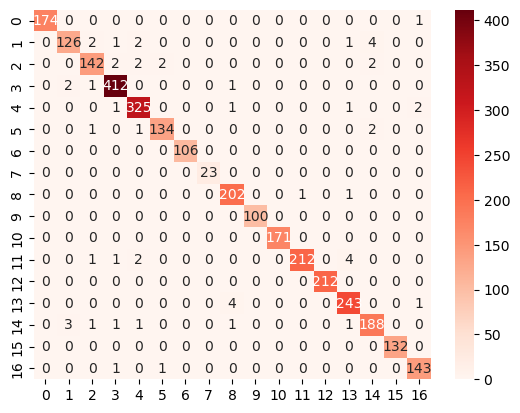

In [45]:
sns.heatmap(matrix, annot=True,cmap='Reds',fmt='g')


In [46]:
#Model saving
import pickle
lrFile=open('LRmodel.pckl','wb')
pickle.dump(pipe_lr_r13,lrFile)
lrFile.close()

In [47]:
#Model loading
global lrLangDetectModel
lrLangDetectFile=open('LRmodel.pckl','rb')
lrLangDetectModel=pickle.load(lrLangDetectFile)
lrLangDetectFile.close()

In [48]:
#Calling trained data to make decisions
def lang_detect(text):
    import numpy as np
    import string
    import re
    import pickle
    translate_table=dict((ord(char),None) for char in string.punctuation)
    global lrLangDetectModel
    lrLangDetectFile=open('LRmodel.pckl','rb')
    lrLangDetectModel=pickle.load(lrLangDetectFile)
    lrLangDetectFile.close()
    text=" ".join(text.split())
    text=text.lower()
    text=re.sub(r"\d+","",text)
    text=text.translate(translate_table)
    pred=lrLangDetectModel.predict([text])
    prob=lrLangDetectModel.predict_proba([text])
    return pred[0]

In [49]:
lang_detect("Hello I just build my own language detection model")

'English'

In [50]:
lang_detect("Hallo, ich habe gerade mein eigenes Spracherkennungsmodell erstellt")

'German'

In [51]:
lang_detect("Bonjour, je viens de construire mon propre modèle de détection de langue")

'French'

In [52]:
lang_detect("Hola, acabo de crear mi propio modelo de detección de idioma")

'Spanish'

In [53]:
lang_detect("ഹലോ ഞാൻ എന്റെ സ്വന്തം ഭാഷാ കണ്ടെത്തൽ മോഡൽ നിർമ്മിക്കുന്നു")

'Malayalam'

In [54]:
lang_detect("हैलो मैं सिर्फ अपनी खुद की भाषा का पता लगाने का मॉडल बनाता हूं")

'Hindi'

In [55]:
lang_detect("வணக்கம், நான் எனது சொந்த மொழி கண்டறிதல் மாதிரியை உருவாக்குகிறேன்")

'Tamil'

In [56]:
lang_detect("Olá, acabei de construir meu próprio modelo de deteção de idioma")

'Portugeese'

In [57]:
lang_detect("Hallo, ik heb net mijn eigen taaldetectiemodel gebouwd")

'Dutch'

In [58]:
lang_detect("Γεια σας, μόλις χτίσω το δικό μου μοντέλο ανίχνευσης γλώσσας")

'Greek'

In [59]:
lang_detect("Здравствуйте, я только что построил свою собственную модель определения языка")

'Russian'

In [60]:
lang_detect("Hej, jeg har lige bygget min egen sprogregistreringsmodel")

'Danish'

In [61]:
lang_detect("Ciao, ho appena creato il mio modello di rilevamento della lingua")

'Italian'

In [62]:
lang_detect("Merhaba, sadece kendi dil algılama modelimi oluşturuyorum")

'Turkish'

In [63]:
lang_detect("Hej, jag bygger bara min egen språkidentifieringsmodell")

'Sweedish'

In [64]:
lang_detect("مرحبا ، لقد قمت فقط ببناء نموذج الكشف عن اللغة الخاص بي")

'Arabic'

In [65]:
lang_detect("ಹಲೋ ನಾನು ನನ್ನ ಸ್ವಂತ ಭಾಷಾ ಪತ್ತೆ ಮಾದರಿಯನ್ನು ನಿರ್ಮಿಸುತ್ತೇನೆ")

'Kannada'

In [66]:
#Creating GUI for the model
import PySimpleGUI as sg

layout = [
    [sg.Text("Enter Text:")],
    [sg.InputText(key="input_text")],
    [sg.Button("Detect Language"), sg.Button("Exit")],
    [sg.Text(size=(30, 1), key="output_text")]
]

window = sg.Window("Language Detection", layout)

def lang_detect(text):
    import numpy as np
    import string
    import re
    import pickle
    translate_table=dict((ord(char),None) for char in string.punctuation)
    global lrLangDetectModel
    lrLangDetectFile=open('LRmodel.pckl','rb')
    lrLangDetectModel=pickle.load(lrLangDetectFile)
    lrLangDetectFile.close()
    text=" ".join(text.split())
    text=text.lower()
    text=re.sub(r"\d+","",text)
    text=text.translate(translate_table)
    pred=lrLangDetectModel.predict([text])
    prob=lrLangDetectModel.predict_proba([text])
    return pred[0]

while True:
    event, values = window.read()

    if event == sg.WINDOW_CLOSED or event == "Exit":
        break
    elif event == "Detect Language":
        input_text = values["input_text"]
        if input_text:
            prediction = lang_detect(input_text)
            window["output_text"].update(f"Language: {prediction}")

window.close()
